In [7]:
import numpy as np
import cv2
from skimage import io
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib.pyplot as plt
%matplotlib inline

def get_obj2img_points():

    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

    # Make a list of calibration images
    #images = glob.glob('../camera_cal/calibration*.jpg')
    images = glob.glob('./camera_cal/calibration*.jpg')

    # Step through the list and search for chessboard corners
    for fname in images:
        img = io.imread(fname)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
        #print(corners.shape)

        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)

    #print(len(imgpoints))
    return ret,images,objpoints,imgpoints



def get_cal_undistort_param(img_size , objpoints, imgpoints):
    
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
   
    return ret,mtx,dist



gbl_img_sizeX = -1
gbl_img_sizeY = -1


def get_list_img_sizeYX():
    global gbl_img_sizeX
    global gbl_img_sizeY
    
    if(gbl_img_sizeX<=0):
        img = io.imread('./camera_cal/calibration1.jpg')
        gbl_img_sizeX=img.shape[0]
        gbl_img_sizeY=img.shape[1]
    
    img_size=[gbl_img_sizeY,gbl_img_sizeX]
    
    return img_size    

def get_tuple_img_sizeYX():
    global gbl_img_sizeX
    global gbl_img_sizeY
    
    if(gbl_img_sizeX<=0):
        img = io.imread('./camera_cal/calibration1.jpg')
        gbl_img_sizeX=img.shape[0]
        gbl_img_sizeY=img.shape[1]
    
    img_size=(gbl_img_sizeY,gbl_img_sizeX)
    
    return img_size    
    

In [12]:
import numpy as np
from skimage import io
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib.pyplot as plt
%matplotlib inline

ret00,images,objpoints,imgpoints= get_obj2img_points()

    
    
####################################################
#img_size = (img.shape[1], img.shape[0])
img_size=get_tuple_img_sizeYX()
ret01,mtx,dist=get_cal_undistort_param(img_size, objpoints, imgpoints)
####################################################


print(ret00)
print(ret01)

True
1.1956513730179685


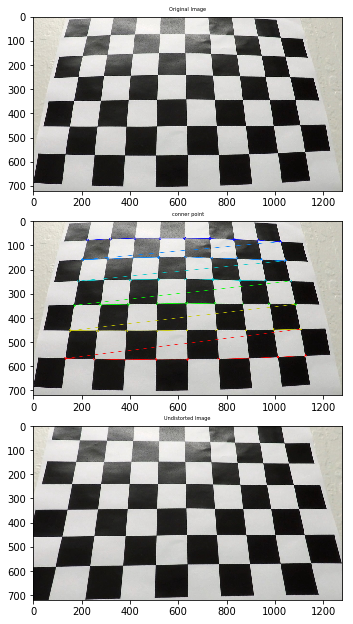

In [13]:
import numpy as np
from skimage import io
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib.pyplot as plt
%matplotlib inline

d=0
d=np.clip(d, 0, len(imgpoints))

img= io.imread(images[d])   

# Draw and display the corners
c_img = img.copy()
c_img = cv2.drawChessboardCorners(c_img, (9,6),imgpoints[d], ret00)
undistorted = img.copy()
undistorted= cv2.undistort(undistorted, mtx, dist, None, mtx)
    

f, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(16, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=5)
ax2.imshow(c_img)
ax2.set_title('conner point', fontsize=5)

ax3.imshow(undistorted)
ax3.set_title('Undistorted Image', fontsize=5)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


In [23]:
import cv2

def get_points_for_warp_operation(img_size):
    src = np.float32(
        [[(img_size[0] / 2) - 55 - 5, img_size[1] / 2 + 100], 
        [((img_size[0] / 6) - 10), img_size[1]], 
        [(img_size[0] * 5 / 6) + 35, img_size[1]], 
        [(img_size[0] / 2 + 55 + 8), img_size[1] / 2 + 100]])
    dst = np.float32(
        [[(img_size[0] / 4), 0], 
        [(img_size[0] / 4), img_size[1]], 
        [(img_size[0] * 3 / 4), img_size[1]], 
        [(img_size[0] * 3 / 4), 0]])
    return src,dst

def draw_lines_img(undist,warped,src,dst):
    disp=[undist,warped]
    
    s=src
    s=np.append(s,src[0])
    s=np.resize(s,(5,2))
    print('src.shape',src.shape,'s.shape',s.shape)
    d=dst
    d=np.append(d,dst[0])
    d=np.resize(d,(5,2))
    for k in range(4):
        cv2.line(disp[0],tuple(s[k]) ,tuple(s[k+1]), (0, 0, 255), 2)
        cv2.line(disp[1],tuple(d[k]) ,tuple(d[k+1]), (0, 0, 255), 2)
            
    plt.figure(figsize=(16,5))
    f, (ax1, ax2) = plt.subplots(1,2,figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(disp[0])
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(disp[1])
    ax2.set_title('warped Image', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    


[[  580.           460.        ]
 [  203.33332825   720.        ]
 [ 1101.66662598   720.        ]
 [  703.           460.        ]]
----------------------
[[ 320.    0.]
 [ 320.  720.]
 [ 960.  720.]
 [ 960.    0.]]
----------------------
----------------------
M [[ -5.12515169e-01  -1.50666316e+00   9.58804168e+02]
 [ -2.77555756e-15  -1.99215624e+00   9.16391870e+02]
 [ -3.25260652e-18  -2.38804132e-03   1.00000000e+00]]
----------------------
src.shape (4, 2) s.shape (5, 2)


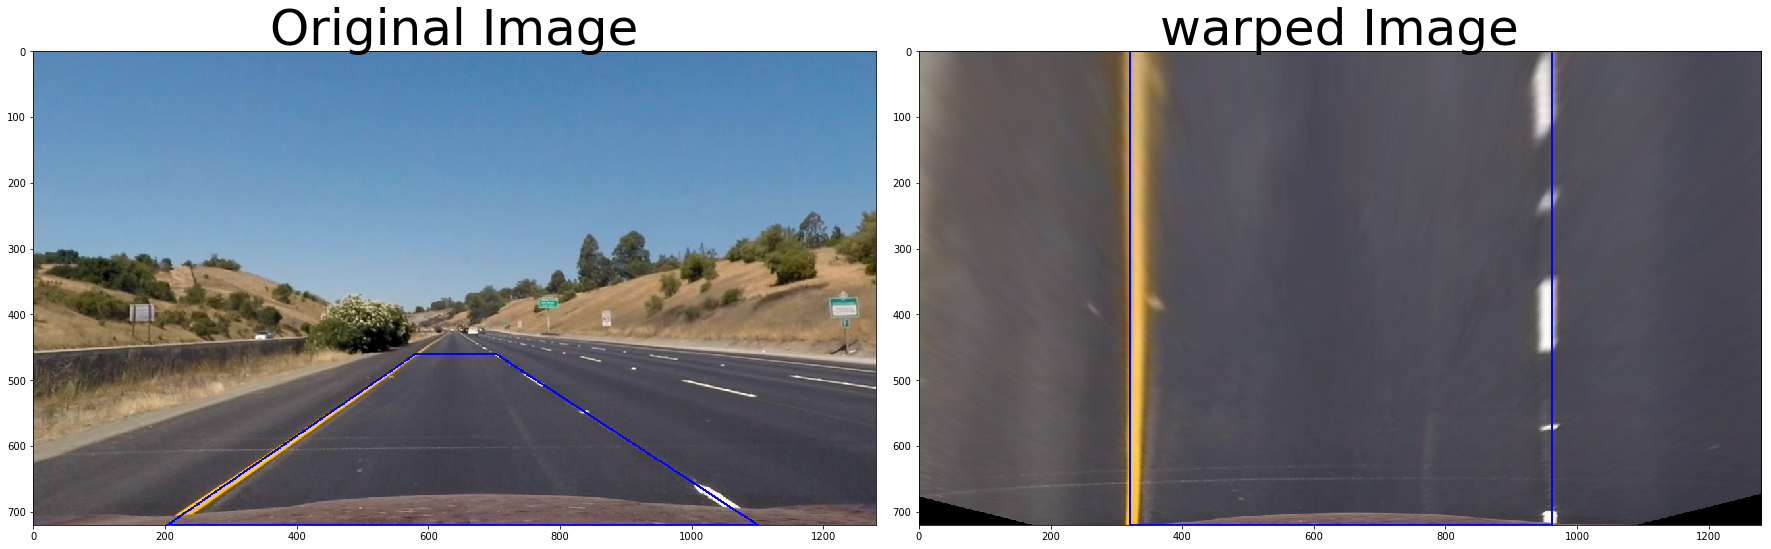

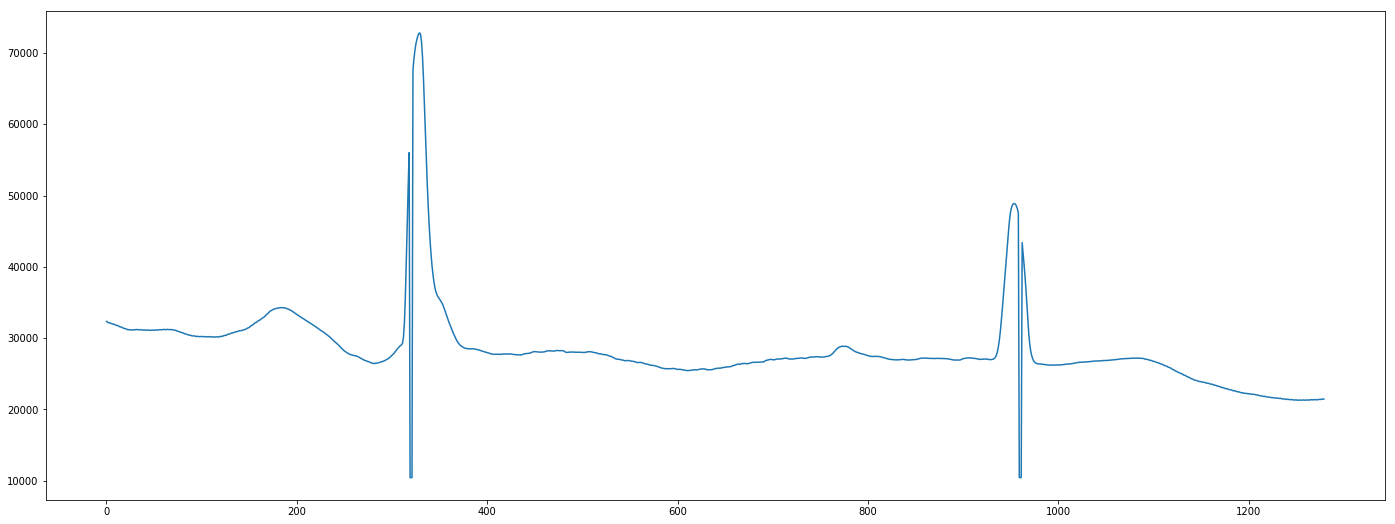

In [24]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def get_M_Matrix():
    img_size=get_tuple_img_sizeYX()
    src , dst =get_points_for_warp_operation(img_size)
    
    
    print(src)
    print('----------------------')
    print(dst)
    print('----------------------')
    M = cv2.getPerspectiveTransform(src, dst)
    print('----------------------')
    print('M',M)
    print('----------------------')
    return M,src,dst


def unwarp(img,  mtx, dist ,M):
    # Use the OpenCV undistort() function to remove distortion
   
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    
    # Convert undistorted image to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)     
    
    #img_size = (gray.shape[1], gray.shape[0])
    img_size=get_tuple_img_sizeYX()


  
    # Warp the image using OpenCV warpPerspective()
    raw_warped = cv2.warpPerspective(undist, M, img_size)
    return raw_warped


from skimage import io    
import glob
sight=glob.glob('./test_images/straight_lines*.jpg')

img=io.imread(sight[0])
img= cv2.undistort(img, mtx, dist, None, mtx)
#img_size = (img.shape[1], img.shape[0])
#ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
M,src,dst=get_M_Matrix()
raw=unwarp(img,mtx,dist,M)
warped=raw.copy()
draw_lines_img(img,warped,src,dst)



import numpy as np
gray = cv2.cvtColor(warped, cv2.COLOR_RGB2GRAY)
histogram = np.sum(gray[gray.shape[0]//2:,:], axis=0)
plt.figure(figsize=(24, 9))
plt.plot(histogram)   